# Análisis Exploratorio de Datos de Ventas

En este notebook realizaremos un Análisis Exploratorio de Datos (EDA) sobre el DataFrame Final que contiene información detallada de las ventas de una cadena de tiendas. El objetivo de este análisis es comprender las características y estructura de los datos, identificar patrones, valores atípicos y analizar cómo se relacionan las diferentes variables.

## Objetivos del Análisis:
1. **Relación entre la ubicación de las tiendas, los ingresos generados, precio promedio de los productos y undidades de producto vendidas**.
2. **Impacto de la estacionalidad en las ventas**: Evaluaremos cómo varían las ventas a lo largo del tiempo y si existen patrones estacionales.
3. **Influencia del precio en las unidades vendidas**: Investigaremos la relación entre el precio de los productos y la cantidad de unidades vendidas.
4. **Relación entre beneficios, ingresos, costes y categorías**: Analizaremos cómo se distribuyen los beneficios, ingresos y costes entre las diferentes categorías de productos.
5. **Productos más vendido por categoría. Relación entre precio, beneficio y unidades vendidas por producto**: identificaremos los productos más vendidos en cada categoría y analizaremos cómo se relacionan el precio, el beneficio y las unidades vendidas de cada producto.

## Contenido:
-   **Librerías necesarias**: Importaremos las librerías necesarias y cargaremos el DataFrame Final.
-   **Análisis Descriptivo**: Realizaremos un análisis descriptivo de las variables principales.
-   **Visualización de Datos**: Utilizaremos gráficos para visualizar las relaciones entre las variables y entender mejor los patrones en los datos.

## Interpretación de Resultados
Conclusiones de los hallazagos y propuestas de acción.


### Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.dates as mdates
import seaborn as sns

### DataFrame Final

In [2]:
# Leemos el DataFrame Final
df = pd.read_csv('..\\data\\df_final.csv')

In [3]:
# Perido de tiempo de los datos (ventas realizadas)
fecha_min = df['sale_date'].min()
fecha_max = df['sale_date'].max()

fecha_min, fecha_max

('2023-01-02', '2023-05-03')

### 1. **Relación entre la ubicación de las tiendas y los ingresos generados**

In [4]:
# Agrupamos por ubicación y sumamos los ingresos
ingresos_por_ubicacion = df.groupby('location')['total_revenue'].sum().reset_index()
# Ordenamos de mayor a menor
ingresos_por_ubicacion = ingresos_por_ubicacion.sort_values('total_revenue', ascending=False) 

ingresos_por_ubicacion

,location,total_revenue
4,Madrid,2765.0
1,Bilbao,2550.0
7,Valencia,1635.0
0,Barcelona,1185.0
3,Itinerante,940.0
5,Online,650.0
6,Sevilla,490.0
2,Desconocido,180.0


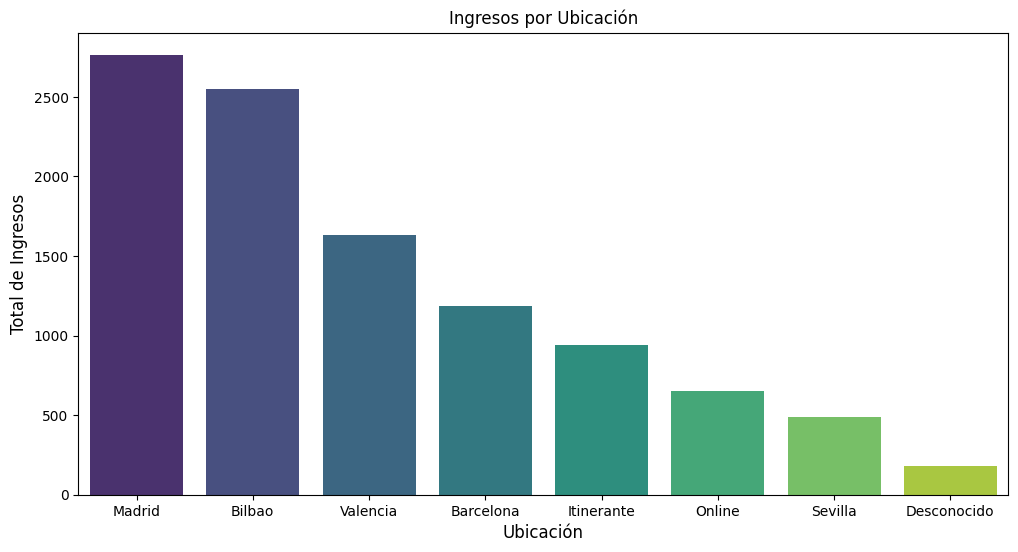

In [5]:
# Gráfico de los ingresos por ubicación
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_revenue', data =  ingresos_por_ubicacion, palette='viridis')
plt.title('Ingresos por Ubicación')
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Total de Ingresos', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [50]:
# Agrupamos primero por ubicación y producto para calcular el precio promedio por producto
precios_por_producto_ubicacion = df.groupby(['location', 'product_name'])['product_price'].mean().reset_index()
precios_por_producto_ubicacion.head()


,location,product_name,product_price
0,Barcelona,Cafetera Premium,90.0
1,Barcelona,Desconocido,200.0
2,Barcelona,Lavadora 7kg,300.0
3,Barcelona,Plancha de Ropa,45.0
4,Barcelona,Tostadora 2 rebanadas,30.0


In [7]:
# Definimos una función utilizando NumPy para calcular la moda
def calcular_moda(series):
    values, counts = np.unique(series, return_counts=True)
    return values[np.argmax(counts)]

In [8]:
# Luego agrupamos solo por ubicación para calcular los estadísticos
estadist_ciudades = precios_por_producto_ubicacion.groupby('location').agg(
    average_price=('product_price', 'mean'),
    median_price=('product_price', 'median'),
    mode_price=('product_price', calcular_moda),  
    max_price=('product_price', 'max'),
    min_price=('product_price', 'min')
).reset_index()
# Ordenamos de mayor a menor por precio medio
estadist_ciudades = estadist_ciudades.sort_values(by='average_price', ascending=False)
estadist_ciudades

,location,average_price,median_price,mode_price,max_price,min_price
1,Bilbao,483.333333,450.0,200.0,800.0,200.0
7,Valencia,248.333333,200.0,45.0,500.0,45.0
6,Sevilla,185.000000,185.0,120.0,250.0,120.0
4,Madrid,145.000000,90.0,35.0,450.0,35.0
0,Barcelona,107.142857,50.0,30.0,300.0,30.0
5,Online,96.666667,25.0,15.0,250.0,15.0
2,Desconocido,90.000000,90.0,90.0,90.0,90.0
3,Itinerante,67.500000,67.5,45.0,90.0,45.0


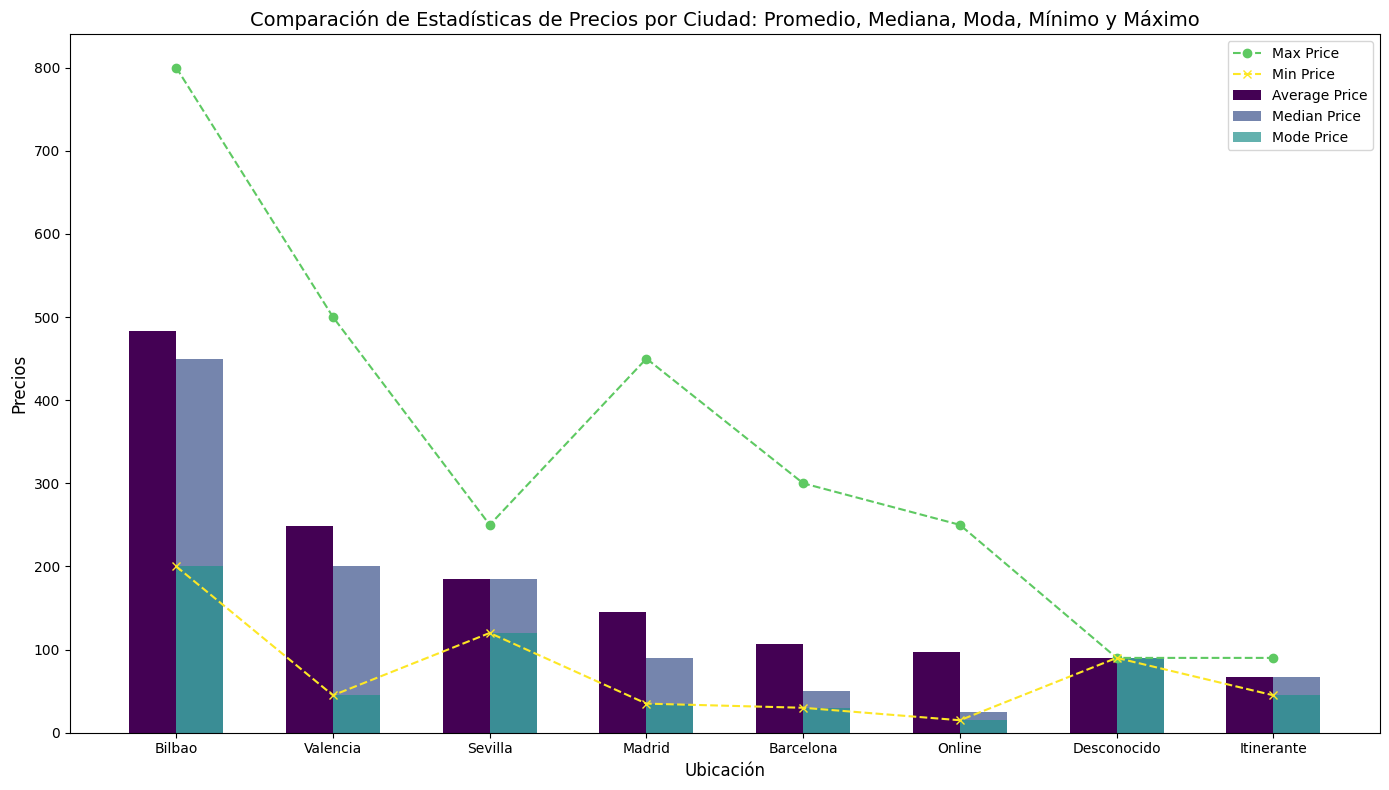

In [9]:
# Obtenemos colores de la paleta 'viridis'
cmap = colormaps.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

# Creamos el gráfico de barras con las estadísticas
plt.figure(figsize=(14, 8))

# Configurar las posiciones de las barras
bar_width = 0.3
positions = np.arange(len(estadist_ciudades['location']))

# Graficar las barras para promedio, mediana y moda
plt.bar(positions - bar_width / 2, estadist_ciudades['average_price'], bar_width, label='Average Price', color=colors[0])
plt.bar(positions + bar_width / 2, estadist_ciudades['median_price'], bar_width, label='Median Price', color=colors[1], alpha=0.7)
plt.bar(positions + bar_width / 2, estadist_ciudades['mode_price'], bar_width, label='Mode Price', color=colors[2], alpha=0.7)

# Graficar líneas discontinuas para los precios máximos y mínimos
plt.plot(positions, estadist_ciudades['max_price'], linestyle='--', marker='o', color=colors[3], label='Max Price')
plt.plot(positions, estadist_ciudades['min_price'], linestyle='--', marker='x', color=colors[4], label='Min Price')


# Configurmos el gráfico
plt.xticks(positions, estadist_ciudades['location'], rotation=0)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Precios', fontsize=12)
plt.title('Comparación de Estadísticas de Precios por Ciudad: Promedio, Mediana, Moda, Mínimo y Máximo', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Agrupamos por ubicación y producto para calcular la cantidad de productos vendidos
cantidad_productos_vendidos = df.groupby('location')['units_sold'].sum().reset_index()
# Ordenamos de mayor a menor
cantidad_productos_vendidos = cantidad_productos_vendidos.sort_values('units_sold', ascending=False)

cantidad_productos_vendidos

,location,units_sold
4,Madrid,26
0,Barcelona,14
3,Itinerante,12
5,Online,10
7,Valencia,9
1,Bilbao,6
6,Sevilla,3
2,Desconocido,2


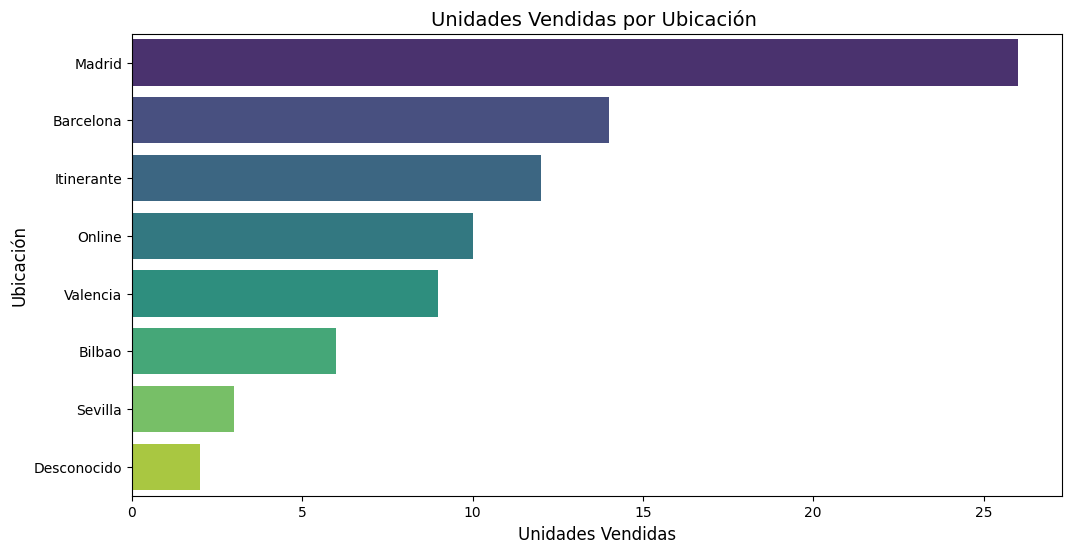

In [11]:
# Gráfico de las unidades vendidas por ubicación
plt.figure(figsize=(12, 6))
sns.barplot(x='units_sold', y='location', data=cantidad_productos_vendidos, palette='viridis')
plt.title('Unidades Vendidas por Ubicación ', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Ubicación', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Dados los resultados podemos conluir que las tiendas de Madrid y Barcelona no obtienes los mayores ingresos, esto se debe a que el precio medio de las tiendas como Bilbao, Valencia son elevados haciendo que aunque vendan pocas unidades de productos puedan alcanzar ingresos elevados en sus ventas.

### 2. **Impacto de la estacionalidad en las ventas**

In [12]:
# Agrupamos por mes y calcular ingresos totales, costes totales y beneficios totales
df['sale_date'] = pd.to_datetime(df['sale_date'])
resumen_mensual = df.groupby(df['sale_date'].dt.to_period('M')).agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Convertimos el período de vuelta a datetime para gráficos
resumen_mensual['sale_date'] = resumen_mensual['sale_date'].dt.to_timestamp()
resumen_mensual

,sale_date,total_revenue,total_cost,total_profit
0,2023-01-01,770.0,516.0,254.0
1,2023-02-01,1340.0,980.0,360.0
2,2023-03-01,2550.0,1816.0,734.0
3,2023-04-01,4870.0,3620.0,1250.0
4,2023-05-01,865.0,605.0,260.0


In [13]:
# Obtenemos los valores medios de ingresos, costes y beneficios para todo el período
media_revenue = resumen_mensual['total_revenue'].mean()
media_cost = resumen_mensual['total_cost'].mean()
media_profit = resumen_mensual['total_profit'].mean()

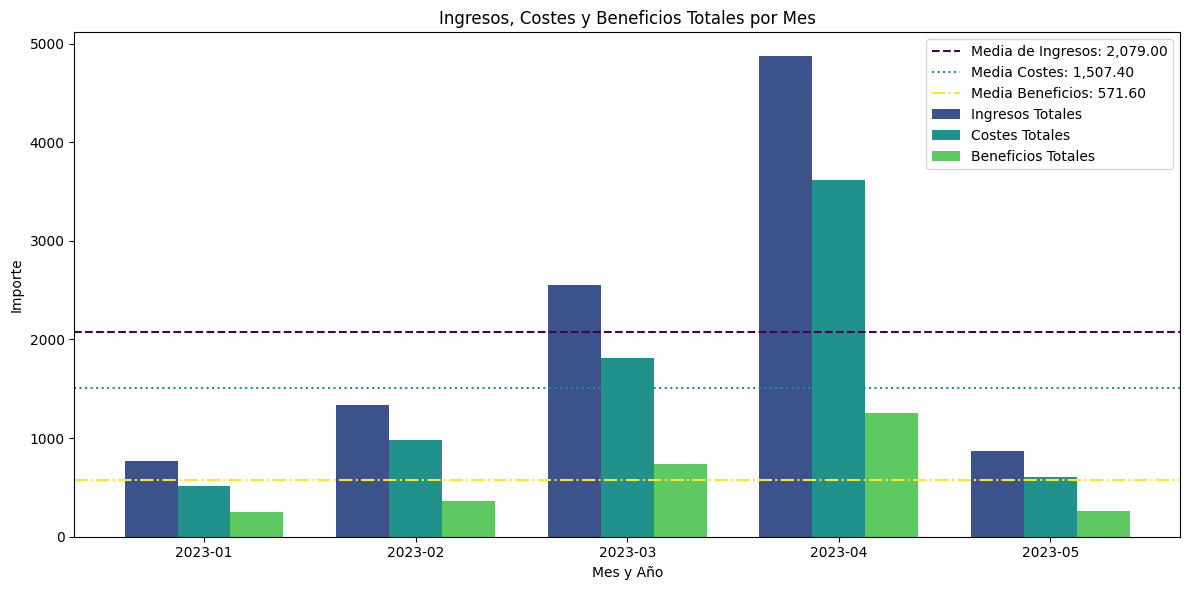

In [14]:
# Creamos el gráfico
plt.figure(figsize=(12, 6))
bar_width = 0.25 
x = range(len(resumen_mensual))

# Creamos las barras para ingresos, costes y beneficios con la paleta 'viridis'
viridis_palette = sns.color_palette("viridis", 3)
plt.bar(x, resumen_mensual['total_revenue'], width=bar_width, label='Ingresos Totales', color=viridis_palette[0], align='center')
plt.bar([p + bar_width for p in x], resumen_mensual['total_cost'], width=bar_width, label='Costes Totales', color=viridis_palette[1], align='center')
plt.bar([p + bar_width * 2 for p in x], resumen_mensual['total_profit'], width=bar_width, label='Beneficios Totales', color=viridis_palette[2], align='center')

# Creamos las líneas discontinuas para las medias
plt.axhline(media_revenue, color='#440154', linestyle='--', label=f'Media de Ingresos: {media_revenue:,.2f}')
plt.axhline(media_cost, color='#21908C', linestyle=':', label=f'Media Costes: {media_cost:,.2f}')
plt.axhline(media_profit, color='#FDE725', linestyle='-.', label=f'Media Beneficios: {media_profit:,.2f}')

# Configuramos el gráfico
plt.xlabel('Mes y Año')
plt.ylabel('Importe')
plt.title('Ingresos, Costes y Beneficios Totales por Mes')
plt.xticks([p + bar_width for p in x], resumen_mensual['sale_date'].dt.strftime('%Y-%m'), rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

El beneficio es superpior en el mes de abri de 2023, justo cuando los ingresos y costes alcanzan sus máximos. Lo cual nos marca una tendencia positiva desde enero. Posteriormente, en mayo hay una caída significativa al ver su beneficio en su mínimo. 

In [15]:
# Agrupamos el número de productos vendidos y el número de ventas mensuales por categoría
ventas_y_productos_mensuales = df.groupby([df['sale_date'].dt.to_period('M'), 'category']).agg(
    total_products_sold=('units_sold', 'sum'),
    total_sales=('sale_id', 'count')
).reset_index()

# Renombrar columnas para mayor claridad
ventas_y_productos_mensuales.columns = ['Mes', 'Categoría', 'Cantidad de Productos Vendidos', 'Número de Ventas']

# Convertimos el período de vuelta a datetime para facilitar gráficos
ventas_y_productos_mensuales['Mes'] = ventas_y_productos_mensuales['Mes'].dt.to_timestamp()
ventas_y_productos_mensuales


,Mes,Categoría,Cantidad de Productos Vendidos,Número de Ventas
0,2023-01-01,Electrodomesticos,11,4
1,2023-02-01,Electrodomesticos,2,2
2,2023-02-01,Electronica,4,3
3,2023-03-01,Electrodomesticos,15,4
4,2023-03-01,Electronica,2,1
5,2023-03-01,Hogar,13,3
6,2023-04-01,Electrodomesticos,16,7
7,2023-04-01,Electronica,8,4
8,2023-04-01,Hogar,1,1
9,2023-05-01,Electrodomesticos,10,4


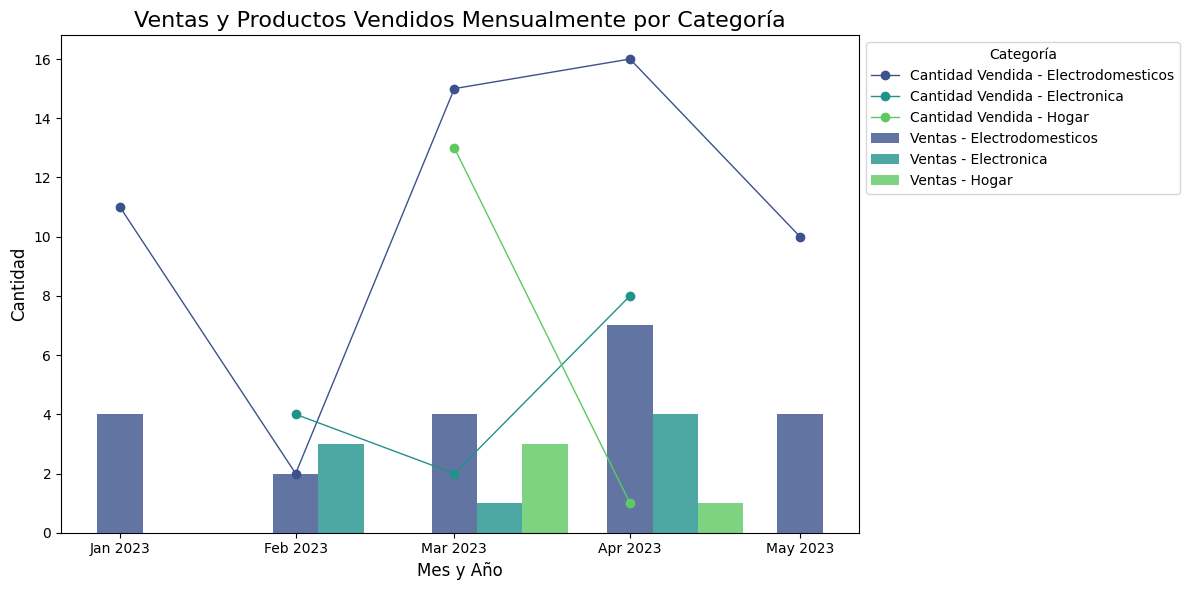

In [16]:
# Definir categorías y colores para el gráfico
categorias = ventas_y_productos_mensuales['Categoría'].unique()
colores = sns.color_palette("viridis", len(categorias))

# Creamos el gráfico
plt.figure(figsize=(12, 6))
bar_width = 8 

# Creamos barras para el número de ventas
for i, categoria in enumerate(categorias):
    data_categoria = ventas_y_productos_mensuales[ventas_y_productos_mensuales['Categoría'] == categoria]
    plt.bar(
        data_categoria['Mes'] + pd.Timedelta(days=bar_width * i),  # Desplaza barras por categoría
        data_categoria['Número de Ventas'],
        width=bar_width,
        color=colores[i],
        alpha=0.8,
        label=f'Ventas - {categoria}'
    )

# Creamos líneas para la cantidad de productos vendidos
for i, categoria in enumerate(categorias):
    data_categoria = ventas_y_productos_mensuales[ventas_y_productos_mensuales['Categoría'] == categoria]
    plt.plot(
        data_categoria['Mes'],
        data_categoria['Cantidad de Productos Vendidos'],
        marker='o',
        linestyle='-',
        linewidth= 1,
        color=colores[i],
        label=f'Cantidad Vendida - {categoria}'
    )

# Ajustamos el eje x para mostrar un mes por intervalo
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostrar un mes por intervalo
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año

# Configuramos el gráfico
plt.title('Ventas y Productos Vendidos Mensualmente por Categoría', fontsize=16)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Categoría', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



Electrodomésticos es la categoría estrella , sus ventas marcan el ritmo de los ingresos a lo largo de los meses. Febrero cuenta con una subida en el gráfico anterior gracias a la venta de productos de electrónica. Así también, la mayor subida de beneficios se establece cuando electrodomésticos y electrónica alcanzan su pico. Esto demuestra que sus ventas son cruciales para obtener mejores resultados.
Por otro lado, hogar no tiene gran presencia, y su tendencia en los meses es poco significativa. Incluso aunque se realizase una venta de la categoría hogar, la empresa alcanzó su pico más elevado de beneficios. 


### 3. **Influencia del precio en las unidades vendidas**

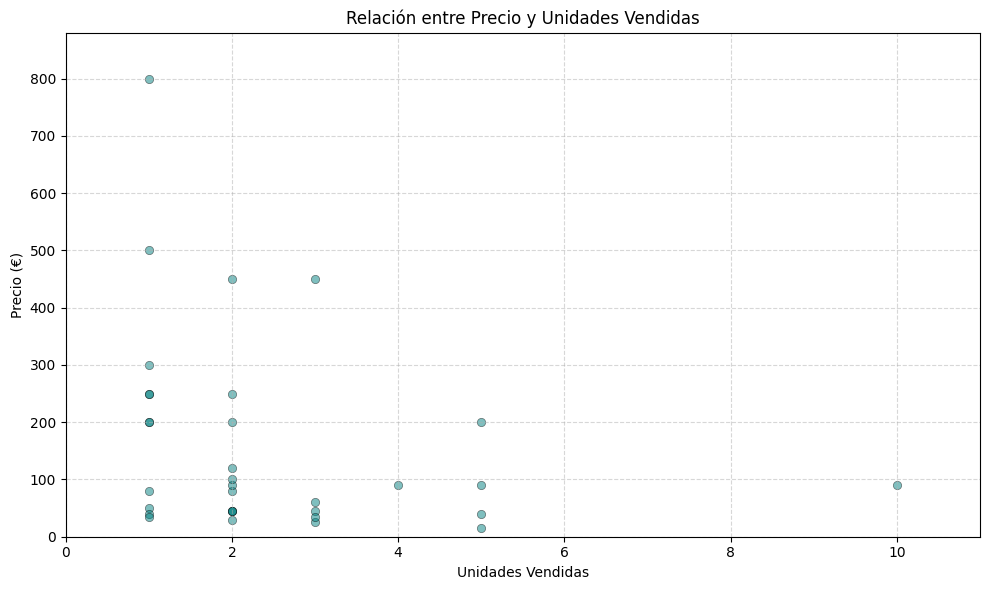

In [ ]:
# Gráfico de dispersión de precio vs unidades vendidas
plt.figure(figsize=(10, 6))

plt.scatter(df['units_sold'], df['product_price'], alpha=0.5, c='teal', edgecolor='k', linewidth=0.5)
plt.title('Relación entre Precio y Unidades Vendidas')
plt.xlabel('Unidades Vendidas')
plt.ylim(0, df['product_price'].max() * 1.1)
plt.ylabel('Precio (€)')
plt.xlim(0, df['units_sold'].max() * 1.1)
plt.xticks(rotation=0, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
# Agrupamos por precio de producto y sumamos las unidades vendidas
data_agrupada = df.groupby(['product_price', 'category'])['units_sold'].sum().reset_index()
# Ordenamos de mayor a menor
data_agrupada = data_agrupada.sort_values('category', ascending=True)
data_agrupada.head()

,product_price,category,units_sold
9,90.0,Electrodomesticos,21
2,30.0,Electrodomesticos,2
3,35.0,Electrodomesticos,4
16,300.0,Electrodomesticos,1
5,45.0,Electrodomesticos,9


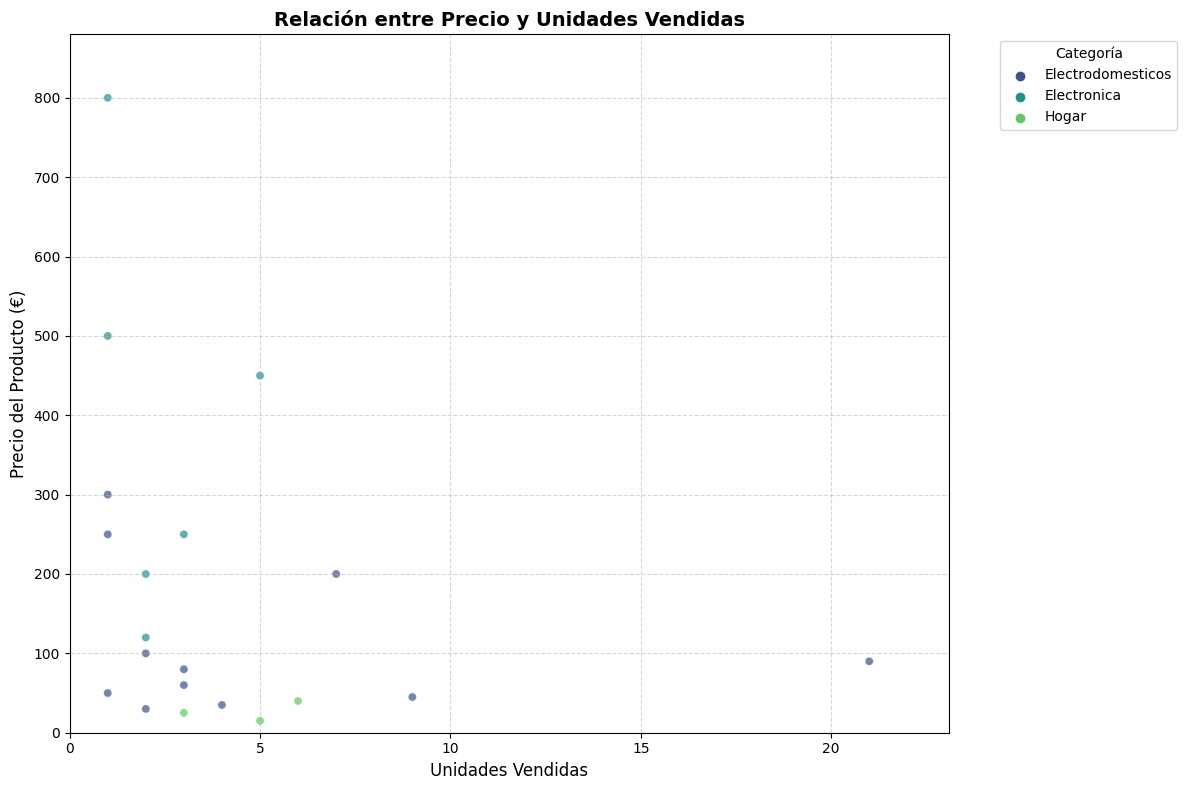

In [48]:
# Creamos el gráfico de dispersión para precio vs unidades vendidas 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data_agrupada['units_sold'],  
    y= data_agrupada['product_price'],   
    hue=data_agrupada['category'],  
    data=data_agrupada,            
    palette='viridis',
    alpha=0.7
)

# Configuramos el gráfico
plt.title('Relación entre Precio y Unidades Vendidas', fontsize=14, fontweight='bold')
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.xlim(0, data_agrupada['units_sold'].max() * 1.1)
plt.ylabel('Precio del Producto (€)', fontsize=12)
plt.ylim(0, data_agrupada['product_price'].max() * 1.1)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Los productos de la categoría, pese a tener los precios de ventas bajos, cuenta con un volumen de ventas muy bajo.
- Los productos de la categoría electrodomésticos stán distribuidos en un rango intermedio de precios con una mayor dispersión en unidades vendidas. Se podría entender que tengan mayor variedad de productos.
- Los productos de la categoría electrónica están en rangos de precio más altos y con menos unidades vendidas. Confirma que sus precios elevados generan un menor consumo y volumen de ventas.

### 4. Relación entre beneficios ingresos costes y categorías

In [20]:
# Agrupamos por categoría y calculamos los ingresos totales, costes totales y beneficios totales
rel_bic_categorias = df.groupby('category').agg(
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

rel_bic_categorias

,category,total_revenue,total_cost,total_profit
0,Electrodomesticos,5065.0,3508.0,1557.0
1,Electronica,4940.0,3760.0,1180.0
2,Hogar,390.0,269.0,121.0


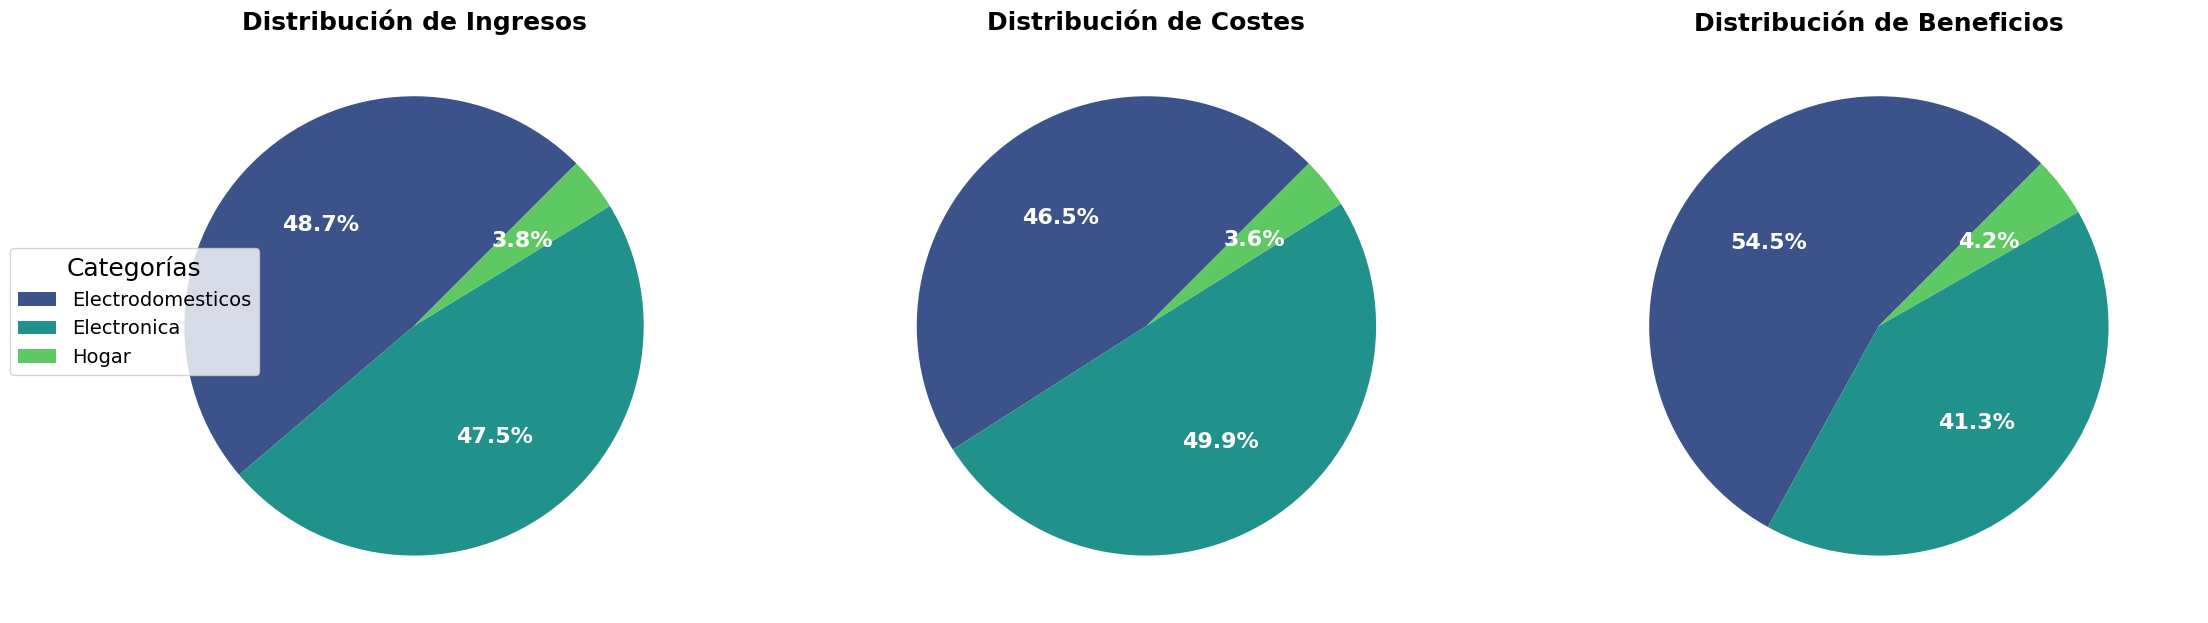

In [21]:
# Creamos una figura con subgráficos para los tres gráficos de pastel
fig, axes = plt.subplots(1, 3, figsize=(26, 10))

# Gráfico de pastel para ingresos totales
axes[0].pie(
    rel_bic_categorias['total_revenue'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 16, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[0].set_title('Distribución de Ingresos', fontsize=18, fontweight='bold')

# Gráfico de pastel para costes totales
axes[1].pie(
    rel_bic_categorias['total_cost'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 16, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[1].set_title('Distribución de Costes', fontsize=18, fontweight='bold')

# Gráfico de pastel para beneficios totales
axes[2].pie(
    rel_bic_categorias['total_profit'],
    labels=rel_bic_categorias['category'],
    textprops={'color': 'white', 'fontsize': 16, 'weight': 'bold'},
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette("viridis", len(rel_bic_categorias['category']))
)
axes[2].set_title('Distribución de Beneficios', fontsize=18, fontweight='bold')

# Leyenda común para los tres gráficos
fig.legend(
    labels=rel_bic_categorias['category'],
    loc='center left',
    fontsize=14,
    title='Categorías',
    title_fontsize=18,
    markerscale=1.5
)

# Ajustamos la disposición
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


## 5. **Productos más vendidos por categoría. Relacion entre precio, beneficio y unidades vendidas por producto**

In [51]:
# Agrupar por categoría y producto para calcular las unidades vendidas, ingresos, costes y beneficios
productos_vendidos = df.groupby(['category', 'product_name']).agg(
    total_units_sold=('units_sold', 'sum'),
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

productos_vendidos.head()

,category,product_name,total_units_sold,total_revenue,total_cost,total_profit
0,Electrodomesticos,Aspiradora Robot,1,250.0,180.0,70.0
1,Electrodomesticos,Batidora Compacta,3,240.0,168.0,72.0
2,Electrodomesticos,Cafetera Basica,3,180.0,120.0,60.0
3,Electrodomesticos,Cafetera Premium,21,1840.0,1260.0,580.0
4,Electrodomesticos,Desconocido,7,1400.0,1000.0,400.0


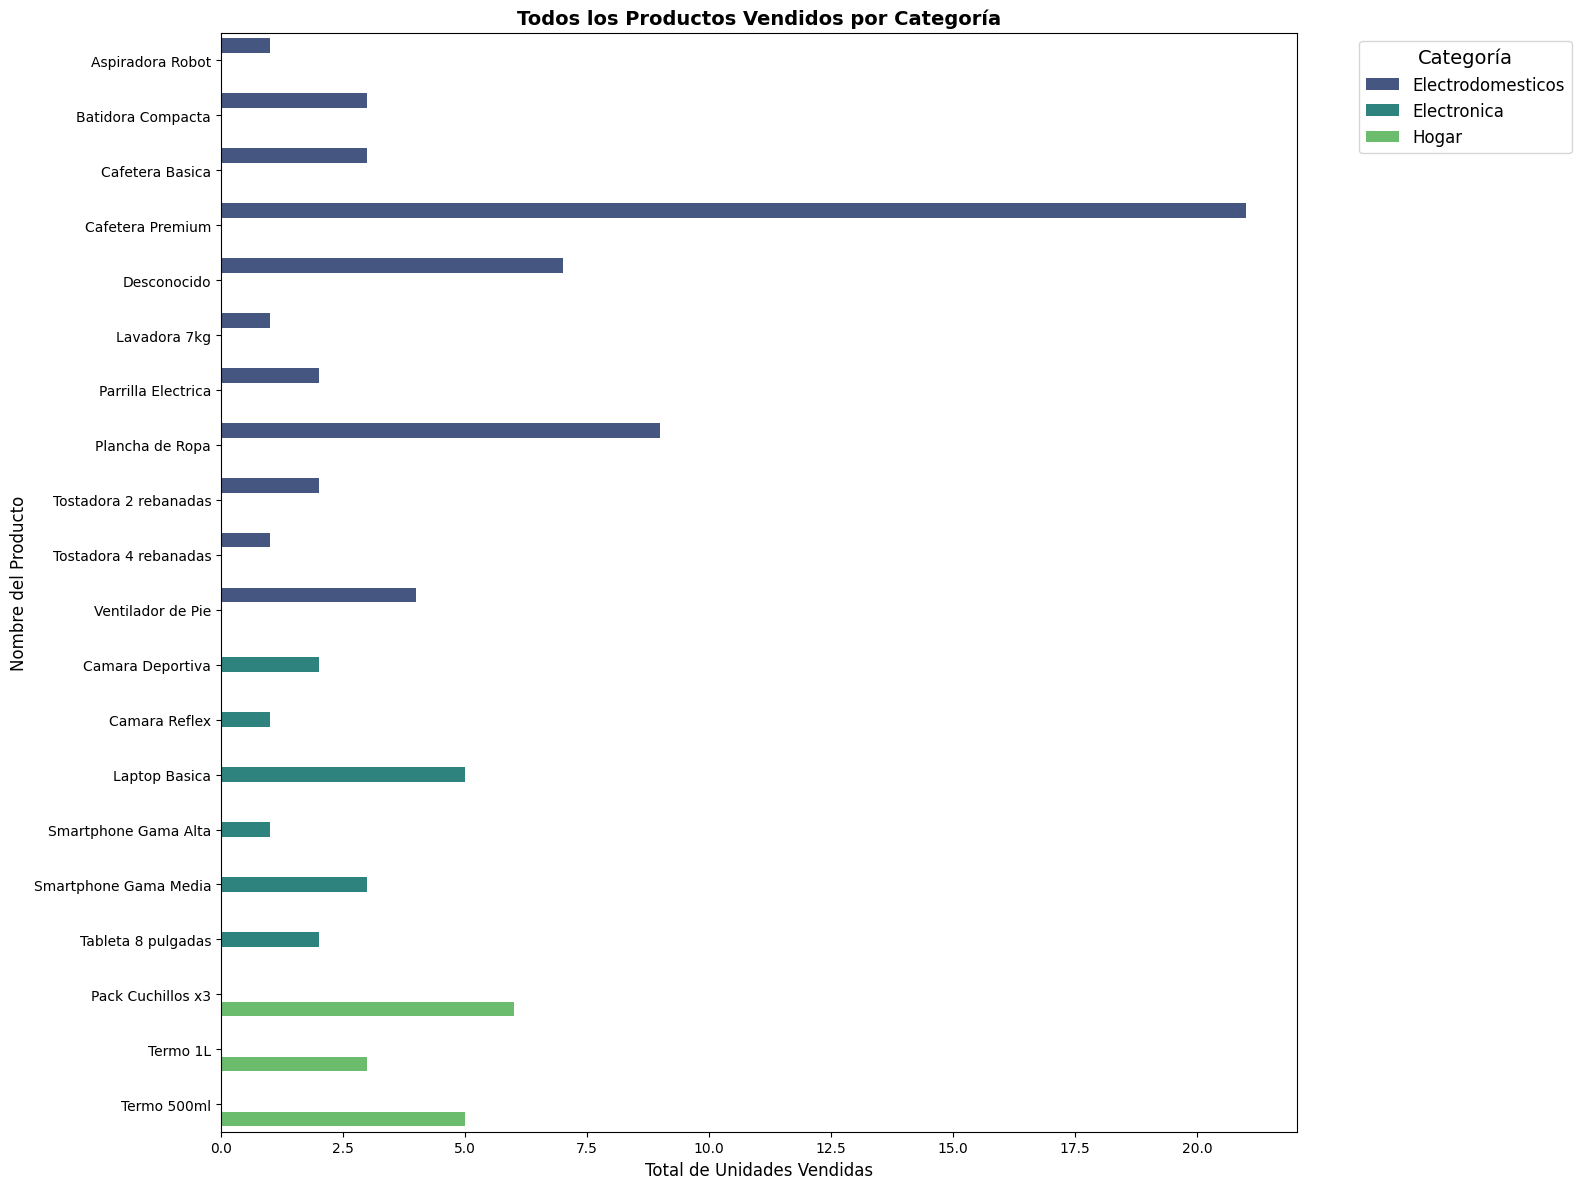

In [23]:
# Gráfico de barras para los productos más vendidos por categoría 
plt.figure(figsize=(16, 12))
sns.barplot(
    x='total_units_sold', 
    y='product_name', 
    hue='category', 
    data=productos_vendidos, 
    palette='viridis')

# Configuramos el gráfico
plt.title('Todos los Productos Vendidos por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Total de Unidades Vendidas', fontsize=12)
plt.ylabel('Nombre del Producto', fontsize=12)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
# Agregamos una columna para el precio de cada producto
productos_vendidos['product_price'] = productos_vendidos['total_revenue'] / productos_vendidos['total_units_sold']
productos_vendidos.head()

,category,product_name,total_units_sold,total_revenue,total_cost,total_profit,product_price
0,Electrodomesticos,Aspiradora Robot,1,250.0,180.0,70.0,250.000000
1,Electrodomesticos,Batidora Compacta,3,240.0,168.0,72.0,80.000000
2,Electrodomesticos,Cafetera Basica,3,180.0,120.0,60.0,60.000000
3,Electrodomesticos,Cafetera Premium,21,1840.0,1260.0,580.0,87.619048
4,Electrodomesticos,Desconocido,7,1400.0,1000.0,400.0,200.000000


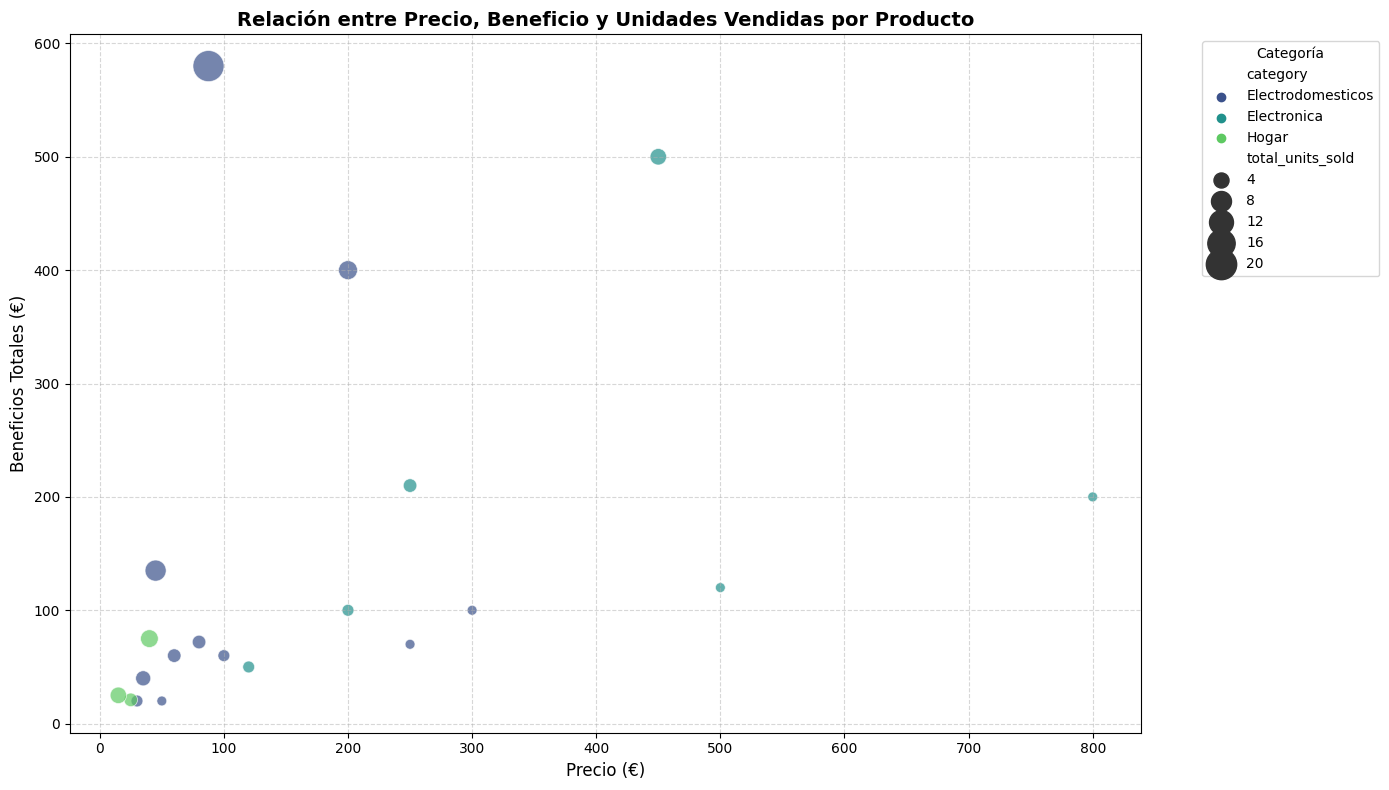

In [25]:
# Gráfico de dispersión con tamaño y color por categoría
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='product_price', 
    y='total_profit', 
    size='total_units_sold', 
    hue='category', 
    data=productos_vendidos, 
    palette='viridis', 
    sizes=(50, 500), 
    alpha=0.7
)

# Configuramos el gráfico
plt.title('Relación entre Precio, Beneficio y Unidades Vendidas por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Beneficios Totales (€)', fontsize=12)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **Interpretación de Resultados:**


1. **Relación entre la ubicación de las tiendas y los ingresos generados:**
- Las tiendas ubicadas en Madrid y Bilbao generan los mayores ingresos, seguidas por Valencia y Barcelona.
- Bilbao y Valencia tienen el precio medio más elevado, en concordancia con sus precios máximos. Es importante destacar que Madrid y Barcelona, siendo las ciudades más grandes, se mantienen en posiciones intermedias.
- En términos de ventas por unidad de producto, las tiendas de Madrid y Barcelona manejan un volumen superior.
  
La ubicación de las tiendas influye significativamente en el número de productos vendidos. Sin embargo, la disposición de los productos y los precios elevados de tiendas como Bilbao y Valencia hacen que los ingresos sean mayores, incluso sin vender grandes cantidades.

La empresa podría incentivar la venta de productos que generen mayores ingresos y aprovechar el volumen de ventas en las grandes ciudades para fortalecer esta situación. De este modo, se podría mejorar el margen de beneficio global y consolidar su posición en el mercado

4. **Impacto de la estacionalidad en las ventas:**
- Los ingresos, costes y beneficios muestran una tendencia creciente desde enero hasta abril, alcanzando su pico en abril de 2023. Asimismo, marzo y abril superan la media de ingresos totales en este periodo de tiempo.
- En mayo, se observa una caída significativa en los beneficios, lo que indica una posible estacionalidad en las ventas.
Las categorías de productos como electrodomésticos y electrónica tienen un impacto notable en los ingresos y beneficios mensuales (marzo-abril 2023). Sin embargo, es la categoría de electrodomésticos la que destaca, ofreciendo mayores volúmenes de productos y ventas realizadas.
- La categoría de hogar muestra poca efectividad y una baja presencia en sus ventas mensuales.
  
El mes en que la compañía alcanza su pico de ventas e ingresos coincide con el mayor número de ventas en las categorías de electrodomésticos y electrónica. Esto puede reflejar una tendencia estacional en las ventas de estas categorías. No obstante, los electrodomésticos mantienen un nivel de ventas estable a lo largo del tiempo.La compañía debería consolidar sus esfuerzos para mantener esta categoría como la principal en sus tiendas. 

Publicidad, impacto en redes sociales, promociones y descuentos podrían aumentar la notoriedad de la compañía y de sus tiendas. Además, su volumen de ventas podría incrementarse tanto en electrodomésticos como en electrónica, destacando que esta última cuenta con precios elevados, lo que resulta atractivo para los consumidores.

3. **Influencia del precio en las unidades vendidas:**
- Los productos con precios más bajos tiene mayores ventas, manteniendo a la categoría de electrodomésticos como principal.
- Los productos de electrónica venden menos unidades en comparación con otras categorías al contar con precios más elevados.
  
Los consumidores son sensibles a los precios, lo cual marca impacto en las unidades vendidas. Podríamos estar hablando de una demanda elástica, en la que según la dispersión en los datos sugiere que factores como promociones, ofertas, calidad-precio del producto y marca pueden influir en las unidades vendidas, aumentando los niveles de ventas de la empresa. 

Algunos consumidores pueden atreverse a comprar a precios más bajos,  permitiendo mejorar las unidades vendidas actuales. Para este caso es necesario estudiar la viabilidad de reducción en costes con el fin mejorar los márgenes de beneficios de la empresa.

4. **Relación entre beneficios, ingresos, costes y categorías:**
- Los electrodomésticos generan los mayores beneficios, ingresos y costes, dominando las tres distribuciones. Hemos podido comprobar que tienen un mayor número de ventas.
- La electrónica tiene una contribución notable en ingresos. Sin embargo, al observar los gráficos anteriores, entendemos que esta categoría vende pocas unidades, lo cual provoca que tenga márgenes de beneficios más ajustados, en línea con sus costes y precios elevados.
- La categoría de hogar tiene una presencia mínima en las tres distribuciones, indicando que sus ventas son escasas y generan poca utilidad para la empresa.
  
Como se ha venido mencionando, la categoría principal, electrodomésticos, ratifica su posición de liderazgo, lo que refuerza la necesidad de incentivar sus ventas y de activar un plan de acción para mejorar aún más la notoriedad de estos productos.

Por otro lado, se podrían optimizar los márgenes de beneficio de la categoría electrónica incentivando las ventas mediante estrategias de precios y publicidad que permitan una mejor relación entre el precio y volumen de ventas. El objetivo sería llamar la atención de aquellos consumidores que optan para esta categoría por precios más bajos.


5. **Productos más vendidos por categoría y relación entre precio, beneficio y unidades vendidas por producto:**
- Los productos más vendidos se sitúan en la categoría de electrodoméstico, siendo la “Cafetera Premium” y “Plancha de Ropa los más demandados por los consumidores. Estos, generan un alto volumen de ventas y beneficios considerables.
- Los productos de electrónica como el "Laptop Básica" y el "Smartphone Gama Media" tienen precios altos y generan beneficios notables, aunque venden menos unidades. 
- En la categoría de hogar, productos como el "Pack Cuchillos x3" y el "Termo 500ml" tienen precios bajos, pero venden un número significativo de unidades. 
  
A través de este análisis, afianzamos la situación comprobando que los mayores ingresos y beneficios se dan con la categoría de electrodomésticos. Sus ventas son cruciales para la empresa, lo que hace que la relación de ventas y beneficios sea positiva para los resultados económicos.

Así también, comprobamos que una acción estratégica en los precios impulsaría un incremento en la demanda, sobre todo para los productos de electrónica con precios elevados y márgenes de beneficios más ajustados.

La necesidad de la empresa para mejorar sus ventas en elctrónica pasa por manejar los precios y sus margenes de beneficos. La presencia de esta debe ir aumenando en las tiendas, destacando con posibles promociones, ofertas, fidelizaciones y publicidad que den paso a convertir esta categoría en una fortaleza de ventas generando mayor einterés en los consumidores. 



